# Modeling Shop Inventory Management

<b> What is a shop? </b>

A shop could be defined as an entity which has a input flow of products and an output flow of products.
Shops make money because they apply a profit margin to every single product so that:

$M_{i, out} \gt M_{i, in}$

Where $M_{i, out}$ is the cost of a product for a customer and $M_{i, in}$ is its cost for shop.

The task of control this flow of products is known as inventory management and is a cornerstone concept for be succesfull in retail sector. Big brands spend millions in strategies to optimize their inventory management, and regarding the small and medium chains they have little knowledge, lack of time and small budget to focus on it.

The aim of this notebook consists on develop a realistic mathematical model of inventory management for retail sector and is intended to be a first sample of a series of work to bring science and technology to this problem.

In [106]:
# importing modules
import math
from random import randint
import numpy as np                
from scipy.integrate import odeint                                                     
import matplotlib.pyplot as plt

<h3> 1. An overview on Population Dynamics </h3>

<h4> 1.1 About foxes and rabbits </h4>

<i> (Code of this section belongs to http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html) </i>

<i> (If you want to know more about population dynamics visit my notebook https://github.com/capitan-ariete/St-Mathew-Island/blob/master/st-matthew-island.ipynb) </i>

Foxes and rabbits are an usual study case for undergraduate students. Imagine a landscape with a given number of rabbits, rabbits eat grass and they reproduce very fast, fourtanetely for the ecosystem foxes eat rabbits and so they indirectly control their consume over grass. Then when foxes reproduce, they eat more rabbits, thus decimate rabbits population. When foxes cannot find enough rabbits to survive they start to pass away and so rabbits populations recovers to a new pick. These ecological dynamics is what is called Population Dynamics.

For this particular case the <a href="https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations"> Lotka Volterra</a> equations modelize the problem and bring an idea of how foxes and rabbits populations are correlated and balance each other in an equilibrited ecosystem. 

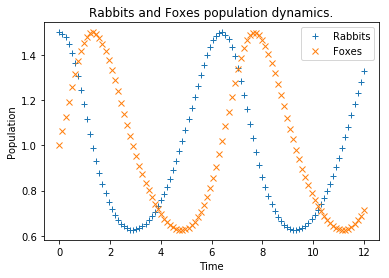

In [4]:
a,b,c,e = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - e*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.title("Rabbits and Foxes population dynamics.")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

<h3> 2. Shop Inventory Dynamics </h3>

<h4> Notation </h4>

$P_{i}$ is a given product of the shop. For instance red apples. 

Since we will think on a single product throughout this notebook, for simplicity we will call it just $P$

<h4> 2.1 Basic equation </h4>

In a shop ecosystem we could consider a customer is a fox, i.e the element that substracts stock from a shop and providers are the rabbit, i.e the ones that bring products to the shop. This a nice start point.

In inventory management the most evident elements are the amount of inventory a shop buys to the provider or product replenishment $\eta$ and the amount of inventory a shop sells to customers or product sales $\lambda$

$$ \frac{dP}{dt} = (\eta - \lambda) \cdot P = \gamma P $$ 

Where $\gamma$ is the growing ratio of a product inventory in shop. The ideal fram is obviously $\gamma = 0$ and so being the product inventory constant over time.

<h4> 2.2 Shrinkage </h4> 

In the same way there is a mortality ratio in biological ecosystems, 
<a href="https://en.wikipedia.org/wiki/Shrinkage_(accounting)">product shrinkage</a> ($\equiv \sigma$) is a reality for retails. In particular think of a fruit store. How many days an orange last in a shop? Few days or weeks, approximately the same for meat and even less for fish, even fashion store has product shrinkage (that's why outlets exist).

Since in BitPhy we have our current focus at fresh market retail shrinkage is a crutial variable to control. Thus our previous equation becomes:

$$ \frac{dP}{dt} = (\eta - \lambda - \sigma) \cdot P = \Gamma P $$ 

# Poner aqui EL GRAFICO AQUEL DEL VASO PARA QUE SE ENTIENDA esta ecuacion

What is the form of shrinkage?

Shrinkage is a variable which value is 0 or close to 0 during a timeframe and then starts growing exponentially until it reaches a maximum (the total amount of product). A sigmoid or logistic function behaves quite a lot like the kind of behaviour we expect:

$$\sigma \approx \frac{1}{1+e^{\iota}}$$

Where $\iota$ is the shrinkage ratio of the product, being very high for fish and fruit and remmarkably smaller for fashion.

In [5]:
def sigmoid_array(x,n=1):
    return [1 / (1 + math.exp(-k))**n for k in x]

def sigmoid(x,n=1):
    return 1 / (1 + math.exp(x))**n

In [6]:
x = np.linspace(-4, 8);
for n in range(1,10):
    y = sigmoid_array(x,n)
    #plt.plot(x, y) # uncomment this line to see how sigmod looks like

For simplicity suppose that for a product $j$ we do not sell anything or we sell to customer the same we buy from providers (customer-provider equilibrium, i.e $\gamma=0$), then the product inventory will follow a <a href="https://en.wikipedia.org/wiki/Van_Genuchten%E2%80%93Gupta_model">van Genuchten–Gupta model</a>

$$ \frac{dP}{dt} = (\gamma - \sigma) \cdot P = - \sigma P \approx \frac{1}{1+e^{\iota}} P$$ 

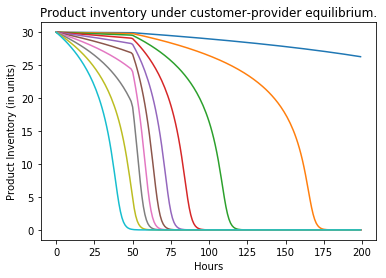

In [7]:
def f(p, time, pmax):
    """
    Product amount considering shrinkage (Genutchen-Gupta like model)
    
    :warning: M must be greater than s0
    """
    r = 25
    m = 25
    pmin=1+pmax/2 # min shrinkage value

    if time > 50:
        return (r-m)*p - sigmoid(p/pmax)*p
    else:
        return (r-m)*p - sigmoid(p/pmin)*p

ts = np.linspace(0, 200, 200)
ic = np.linspace(4.0, 10.0, 10)
P0 = 30

for pmax in ic:
    Ps = odeint(f, P0, ts, args=tuple([pmax]))
    plt.plot(Ps, "-")
    
plt.title("Product inventory under customer-provider equilibrium.")
plt.ylabel("Product Inventory (in units)")
plt.xlabel("Hours");

We can see how for different products the shrinkage effect varies and so the importance of product-shrinkage over sales.
Also note how we have considered a step shrinkage coefficient, i.e $\iota = \iota(t)$ (it is a trick to achieve beautiful curves, however in general shrinkage will be also a function of time)

<h4> 2.3 Replenishment and Sales</h4>

Product replenishment is the amount of product the shop buys to the provider, either the provider is a factory, farm or a distributor. So far we have considered product replenishment as a constant function $\frac{d\eta}{dt}=0$.

How does actually product replenishment looks like?

In retailers the replenishment use to happen in discrete timeframes, for instance once a week on mondays. We can consider the replenishment function as a dirac delta $\delta(·)$ that replenish N units of product inventory recursively with a frequency $\omega$, which is known as <a href="https://en.wikipedia.org/wiki/Dirac_comb">Dirac Comb</a> or impulse train.

$$\eta \approx N\sum_{\kappa=0} \delta(t-\kappa T)$$

Where $T$ is the period of replenishment (that we will consider constant as the amount N for simplicity).

![title](img/Dirac_comb.svg.png)

For simplicity we can consider Sales a constant function over time (it is actually much more constant over time than replenishment). However a more realistic Sales function looks like in weekly basis and in hourly basis (as one can see in the images below). Hence,

$$\frac{d\lambda}{dt}=0$$

![title](img/heatmap.png)
![title](img/daily_sales.png)

<h4> 2.4 Final equation </h4>

Finally a realistic scenario (with many approximations though) brings us out of replenishment-sales equilibrium to our first general equation for retail inventory management:

$$ \frac{dP}{dt} = \bigg[ \bigg(N\sum_{\kappa=0} \delta(t-\kappa T)\bigg) - \lambda -\frac{1}{1+e^{\iota(t)}} \bigg] P$$ 

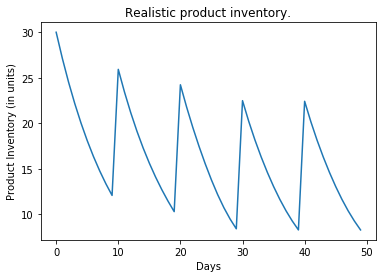

In [379]:
def f(p, time, pmax):
    """
    Product amount considering shrinkage (Genutchen-Gupta like model)
    
    :warning: M must be greater than s0
    """
    r = 0
    m = .1
    pmin=1+pmax/2 # min shrinkage value

    if time > 50:
        return (r-m)*p - sigmoid(p/pmax)*p
    else:
        return (r-m)*p - sigmoid(p/pmin)*p

def replenishment(Ps):
    """
    """
    l = [x[0] for x in Ps]
    l_replenish = [x/2 for x in l]
    for x in range(0,len(l),10):
        if x > 0:
            if l[x] < 15: # if we have less than 20 units then we replenish such product
                l_new = [l_replenish[i-x] if i >= x else 0 for i in range(len(l))]
                l = [l_new[i] + l[i] for i in range(len(l))]
    return l
    

"""
Initial
"""
ts = np.linspace(0, 100, 100)
pmax = 0.1
P0 = 30
Ps = odeint(f, P0, ts, args=tuple([pmax]))

"""
Replenishment
"""
Ps = replenishment(Ps)
plt.plot(Ps[0:50], "-")
    
plt.title("Realistic product inventory.")
plt.ylabel("Product Inventory (in units)")
plt.xlabel("Days");

We can see how weak is this supply chain.

Every hour (day or week or whatever) the owner has to count its product number. If the value goes below a threshold, it has to call her provider to replenish inventory. We are considering here the replenishment is instantaneous.

Even for constant sales, and instantaneous replenishment we see how easy is by just changing a number to get out-of-stock levels (which means loss money and clients).

<h3> 3. BitPhy and Inventory Dynamics </h3>

What is the part of inventory management that the shop owner can control?

$$ \frac{dP}{dt} = \bigg[ \bigg(N\sum_{\kappa=0} \delta(t-\kappa T)\bigg) - \lambda -\frac{1}{1+e^{\iota(t)}} \bigg] P$$ 

The most obvious is replenishment, $\eta$. Shop owners have to manage very well which amount of what product they need to increase in their inventory so that they can keep providing it to their customers. But also offers and other strategies could be played to improve sales, $\lambda$

Nowadays BitPhy product-sales prediction give to shop owners high accuracy product-sales in weekly basis $\lambda$. This allows to the owner to answer the question about the amount. Also the offers prescriptions helps to maximize $\lambda$.

$$ BitPhy_{(2018)} \rightarrow \lambda $$

In 2019 BitPhy is intended to get into the retailer supply chain, what means to automatize the $\eta$. We know the sales forecasting and then we can choose the best moment to automatically call the provider to bring new inventory. And by doing so we will know the current available inventory in store.

$$ BitPhy_{(2019)} \rightarrow \eta , \lambda $$

# Falta Poner 
aqui EL GRAFICO AQUEL DEL VASO PARA QUE SE ENTIENDA esta ecuacion

<h3> 4. Further work: advanced inventory dynamics </h3>

Different crutial aspects have been ignored along this notebook and need to be considered for a proper inventory management model, some follows:

<b>1st</b> $\lambda$ could be manipulated by the shop owner if he plays with offers and bargains, thus sales is a much more complicated model that it seems:

$$\lambda = \lambda(calendar, weather, events, location, offers)$$

<b>2nd</b> Nowadays retailers have two main channels to reach customers, namely: <u>physical shops</u> and <u>e-commerce</u>. This is what is called <a href='https://en.wikipedia.org/wiki/Omnichannel#Retail'>Omnichannel</a>. Both are platforms for them to flow their stock to clients and then getting their profit margin. Actually if we think of omnichannel:

$$\lambda = \lambda_{physical-store} + \lambda_{e-commerce}$$

And the predictive model for this two lambdas is actually very different.

<b>3rd</b> The weather does not only impacts on sales but also on shrinkage:

$$\sigma = \sigma(product, weather)$$

<b>4th</b> Replenishment $\sigma$ needs time which could be variable by logistics reasons. Also products cost varies sometimes very frequently like in fish market.

$$\eta = \eta(logistics, cost-variances)$$

<h3> 5. Conclusions </h3>

Inventory management is a hard and complex problem. Throughout this notebook we have highlight some of the concepts involved. First we have defined the main variables that rule the product flow and from there we have printed our knowledge of the sector to build a realistic equation that with some approximations fits the system behaviour.

Our equation besides its simplicity shows how vulnerable are retailers under small shifts of variables, in physics we call it metastable state. Normal size retailers have from hundreds to thousands of SKU, to try to avoid out-of-stock problem becomes almost impossible for them and a big leap towards automatization must be done in order to both help them become more competitive against the big fishes and for obvious ecological reasons.

To the moment we are not aware of any other academic research trying to modelize this problem with a similar approach to ours. Therefore, we do believe that this work could flip and encourage further attention of the community to modelize different conditions and to try to find a mathematical frame that describes accurately different scenarios of inventory management for the retail sector.

Recapping, we think that study this system is crutial for the future of retail sector, in particular for the small and medium chains that cannot afford expensive consultants to enhance their product flow.